In [ ]:
#R.Keerthana
#PRODIGY_DS_04

In [1]:
!pip install opendatasets
!pip install catboost

In [2]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import spacy
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import spacy

In [5]:
# Read data
columns= ["id","Company","Label","Text"]
df_train = pd.read_csv("C:/Users/harih/Music/twitter.csv",names=columns)
df_val = pd.read_csv("C:/Users/harih/Music/twitter 2.csv",names=columns)
# Concatenate data
df = pd.concat([df_train, df_val], ignore_index=True)
df.head()

,id,Company,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.shape

(75682, 4)

In [13]:
# info about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       75682 non-null  int64 
 1   Company  75682 non-null  object
 2   Label    75682 non-null  object
 3   Text     74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
# check null values
df.isna().sum()

id           0
Company      0
Label        0
Text       686
dtype: int64

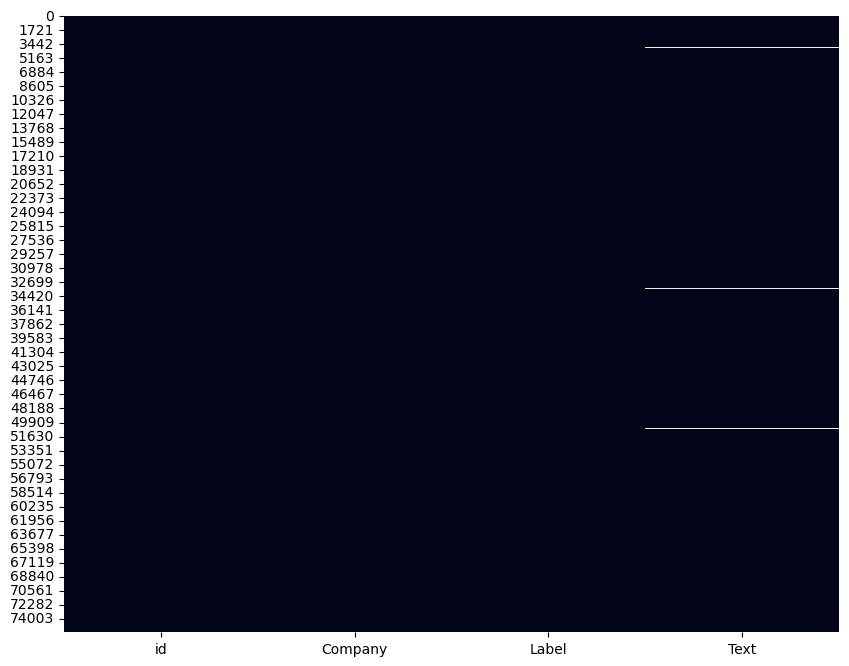

In [7]:
# Identify null data with graph
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
#EDA

In [9]:
# Balance in  category feature "Label"
conteo = df['Label'].value_counts()
fig = px.pie(names=conteo.index, values=conteo.values, title='Distribution of Labels')
fig.show()

In [22]:
target_count = df['Label'].value_counts().reset_index()
target_count

,Label,count
0,Negative,21790
1,Positive,19846
2,Neutral,17878
3,Irrelevant,12624


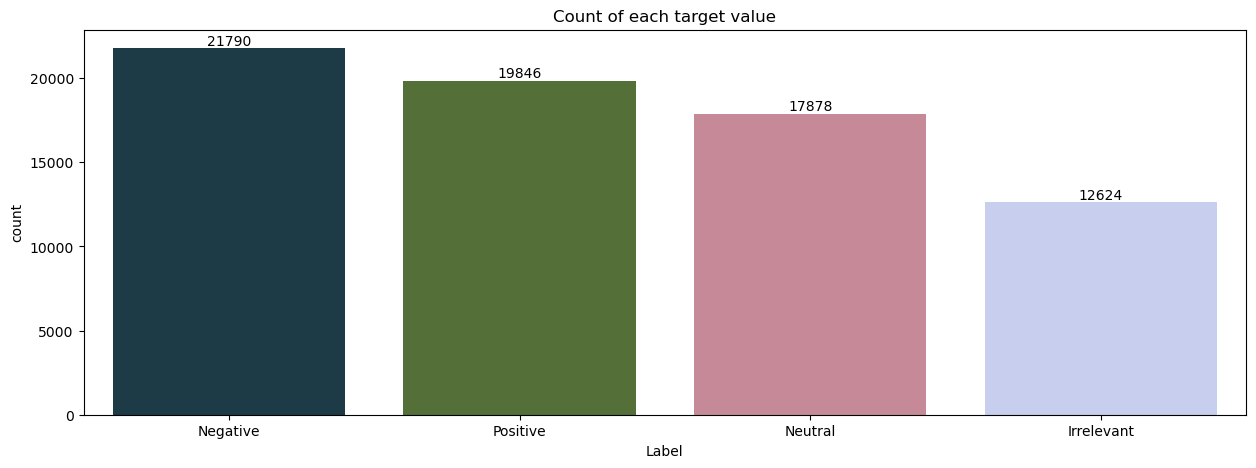

In [23]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=target_count,x='Label',y='count',palette='cubehelix')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Count of each target value")    
plt.show()

In [25]:
pd.crosstab(df.Label , df.Company).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Neutral'] , cmap='BuGn')

Label,Irrelevant,Negative,Neutral,Positive
Company,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,978
CS-GO,624,335,530,721
CallOfDuty,668,865,370,430
CallOfDutyBlackopsColdWar,548,542,343,823
Cyberpunk2077,462,361,458,908


In [10]:
# What game have more comments
conteo = df["Company"].value_counts().reset_index()
conteo.columns = ['Company', 'count']
# Create graphic of bar 
fig = px.bar(conteo, y='Company', x='count', orientation='h',
             height=1000)  # Adjust chart height
fig.show()

In [26]:
# Game with more positive comments
df1 = df.groupby(['Company', 'Label']).size().reset_index(name='count')
# Filter rows where  'Label' is 'Positive'
df1_positive = df1[df1['Label'] == 'Positive']
# Sort descending
df1_positive = df1_positive.sort_values(by='count', ascending=True)
# Show
print(df1_positive.head(4))

# Create graphic of bar with px
fig = px.bar(df1_positive, y='Company', x='count', orientation='h', title='Top Positive Comments',
             color='count')
fig.update_traces(marker=dict(colorscale='Viridis'), selector=dict(type='bar'))
fig.update_layout(height=900)
# Show
fig.show()

             Company     Label  count
47          Facebook  Positive    154
127  johnson&johnson  Positive    254
3             Amazon  Positive    306
55            Google  Positive    341


In [27]:
# Game with more negative commnets 
df2 = df.groupby(['Company', 'Label']).size().reset_index(name='count')
# Filter rows where 'Label' is 'Negative'
df1_negative = df1[df1['Label'] == 'Negative']
# Sort descending
df1_negative = df1_negative.sort_values(by='count', ascending=True)
# Show
print(df1_negative.head(4))


# Create graphic of bar with px
fig = px.bar(df1_negative, y='Company', x='count', orientation='h', title='Top Negative Comments',
             color='count')
fig.update_traces(marker=dict(colorscale='Plasma'), selector=dict(type='bar'))
fig.update_layout(height=900)
# Show 
fig.show()

                    Company     Label  count
101  RedDeadRedemption(RDR)  Negative    290
117            WorldOfCraft  Negative    328
21                    CS-GO  Negative    335
121           Xbox(Xseries)  Negative    357


In [28]:
# Game with more neutral comments
df2 = df.groupby(['Company', 'Label']).size().reset_index(name='count')
# Filter rows where 'Label' is 'Neutral'
df1_neutro = df1[df1['Label'] == 'Neutral']
# Sort descending
df1_neutro = df1_neutro.sort_values(by='count', ascending=True)
# Show
print(df1_neutro.head(4))


# Create graphic of bar with px
fig = px.bar(df1_neutro, y='Company', x='count', orientation='h', title='Top Neutral Comments',
             color='count')
fig.update_traces(marker=dict(colorscale='Plasma'), selector=dict(type='bar'))
fig.update_layout(height=900)
# Show of graphic
fig.show()

           Company    Label  count
42            FIFA  Neutral    103
10  AssassinsCreed  Neutral    155
50        Fortnite  Neutral    160
74       MaddenNFL  Neutral    190


In [30]:
# Calculate the number of words per sentence
df = df.dropna(subset=['Text'])# Eliminamos las filas con  NaN.
# Apply method to count
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

In [34]:
# Apply hist. in "word_count"
fig = px.histogram(df, x='word_count', title='Histogram of Word Count per Sentence')
fig.show()

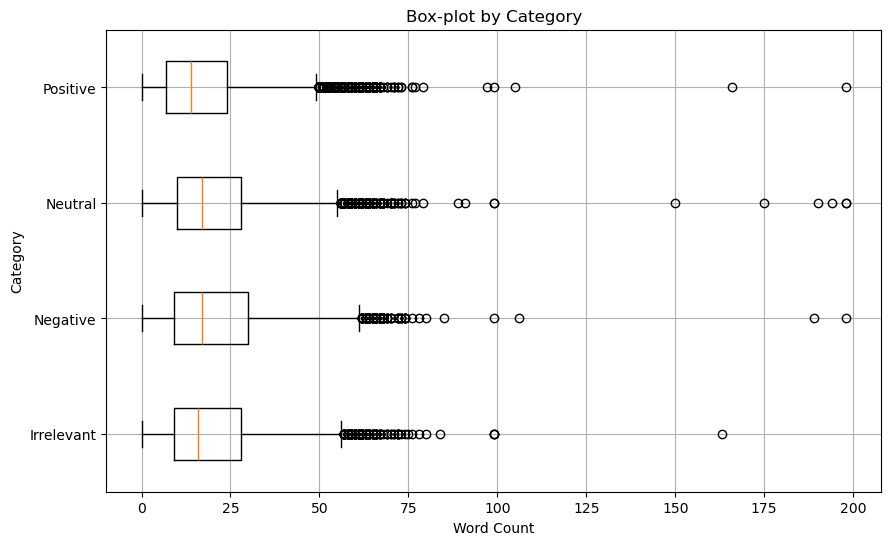

In [37]:
# Clustering for category data
grouped_data = df.groupby('Label')['word_count'].apply(list)
# Create graphic box
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data.values, labels=grouped_data.index, vert=False)
plt.title('Box-plot by Category')
plt.xlabel('Word Count')
plt.ylabel('Category')
plt.grid(True)
plt.show()

In [38]:
# wordcloud
from wordcloud import WordCloud
from collections import Counter


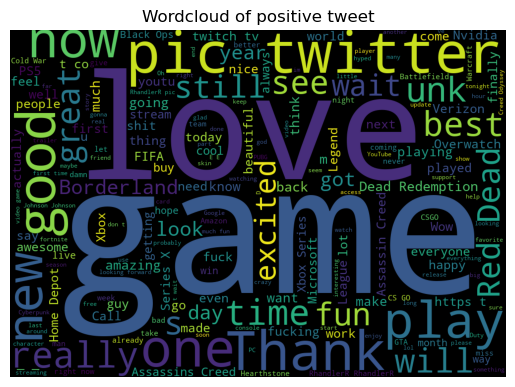

In [39]:
#word cloud for positive tweets
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
positive = wc.generate(df[df['Label']=='Positive']['Text'].str.cat(sep=" "))
plt.title('Wordcloud of positive tweet')
plt.axis('off')
plt.imshow(positive)
plt.show()

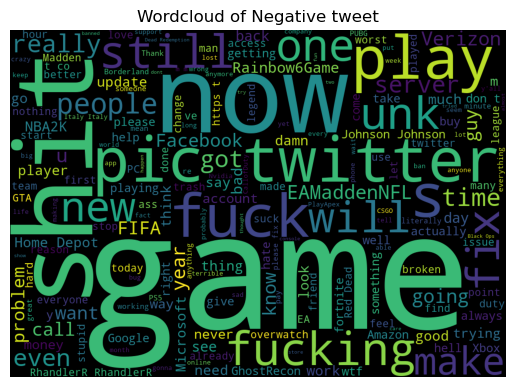

In [40]:
# word cloud for negative tweets
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
negative = wc.generate(df[df['Label']=='Negative']['Text'].str.cat(sep=" "))
plt.title('Wordcloud of Negative tweet')
plt.axis('off')
plt.imshow(negative)
plt.show()

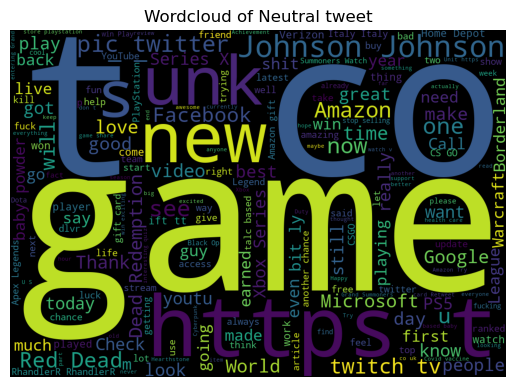

In [41]:
# word cloud for neutral tweets
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
neutral = wc.generate(df[df['Label']=='Neutral']['Text'].str.cat(sep=" "))
plt.title('Wordcloud of Neutral tweet')
plt.axis('off')
plt.imshow(neutral)
plt.show()

**PREPROCESSING**

In [14]:
# Drop nulls
df.dropna(inplace=True)

In [15]:
# Load pack preprocessor
nlp = spacy.load("en_core_web_sm")
# Funcion a desarrolla varios procesos en el texto:This function develops several tasks:
# -Tokenize
# -Stop word removal and stemming
# -Tokens filters
# -Reconstruction of the processed text

def preprocess(text):

    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

# Apply def
df["Preprocessed_Text"]=df["Text"].apply(preprocess)

In [16]:
df.head()

,id,Company,Label,Text,word_count,Preprocessed_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,m get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,m get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,m come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,m get borderland 2 murder


In [17]:
le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Label'])

In [18]:
X= df[["Company", "Preprocessed_Text"]]
y= df['Label']

In [19]:
# Combine "Preprocessed_text" and "Company" columns
X['Combined_Text'] = X['Preprocessed_Text'] + ' ' + X['Company']

# Create object TfidVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Apply object in column
X = vectorizer.fit_transform(X['Combined_Text'])

/tmp/ipykernel_18/2852642539.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=df['Label'])#stratify es para respete el balance de etiquetas cuando se realiza el split.

In [21]:
print("Dimension de X_train:", X_train.shape)
print("Dimension de X_test:", X_test.shape)

Dimension de X_train: (59996, 28400)
Dimension de X_test: (15000, 28400)


In [22]:
# MODEL: Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Measure start time 
start_time = time.time()

# Fit
rf_model.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculation time
time_rf = end_time - start_time
print("Training Time:", time_rf, "seconds")

# Test prediction
y_pred_rf = rf_model.predict(X_test)

# Presicion Calculation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

Training Time: 312.04785323143005 seconds
Accuracy of Random Forest: 0.9410666666666667


In [23]:
# MODEL: KNN
knn_model = KNeighborsClassifier()

# Measure start time
start_time = time.time()

# Fit
knn_model.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Time calculation of train
time_knn = end_time - start_time
print("Training Time:", time_knn, "seconds")

# Test prediction 
y_pred_knn = knn_model.predict(X_test)

# Presicion Calculation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Training Time: 0.008800506591796875 seconds
Accuracy of KNN: 0.9181333333333334


In [24]:
# MODEL: PassiveAggressive
clf = PassiveAggressiveClassifier(C=1.0, loss='hinge', tol=1e-3, max_iter=500, fit_intercept=True, random_state=42)

# Measure start time
start_time = time.time()

# Fit
clf.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Test prediction
y_pred = clf.predict(X_test)

# Time calculation of train
time_p = end_time - start_time
print("Training Time:", time_p, "seconds")

# Presicion Calculation
accuracy_p = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_p)

Training Time: 1.729599952697754 seconds
Accuracy: 0.8542666666666666


In [25]:
# MODEL: CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', random_state=42)

# Measure start  time 
start_time = time.time()

# Train of model
catboost_model.fit(X_train, y_train, verbose=False)

# Measure end time
end_time = time.time()

# Time calculation of train
time_cat = end_time - start_time
print("Training Time:", time_cat, "seconds")

# Test prediction
y_pred_catboost = catboost_model.predict(X_test)

# Presicion Calculation
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy of CatBoost:", accuracy_catboost)

Training Time: 80.84777998924255 seconds
Accuracy of CatBoost: 0.535


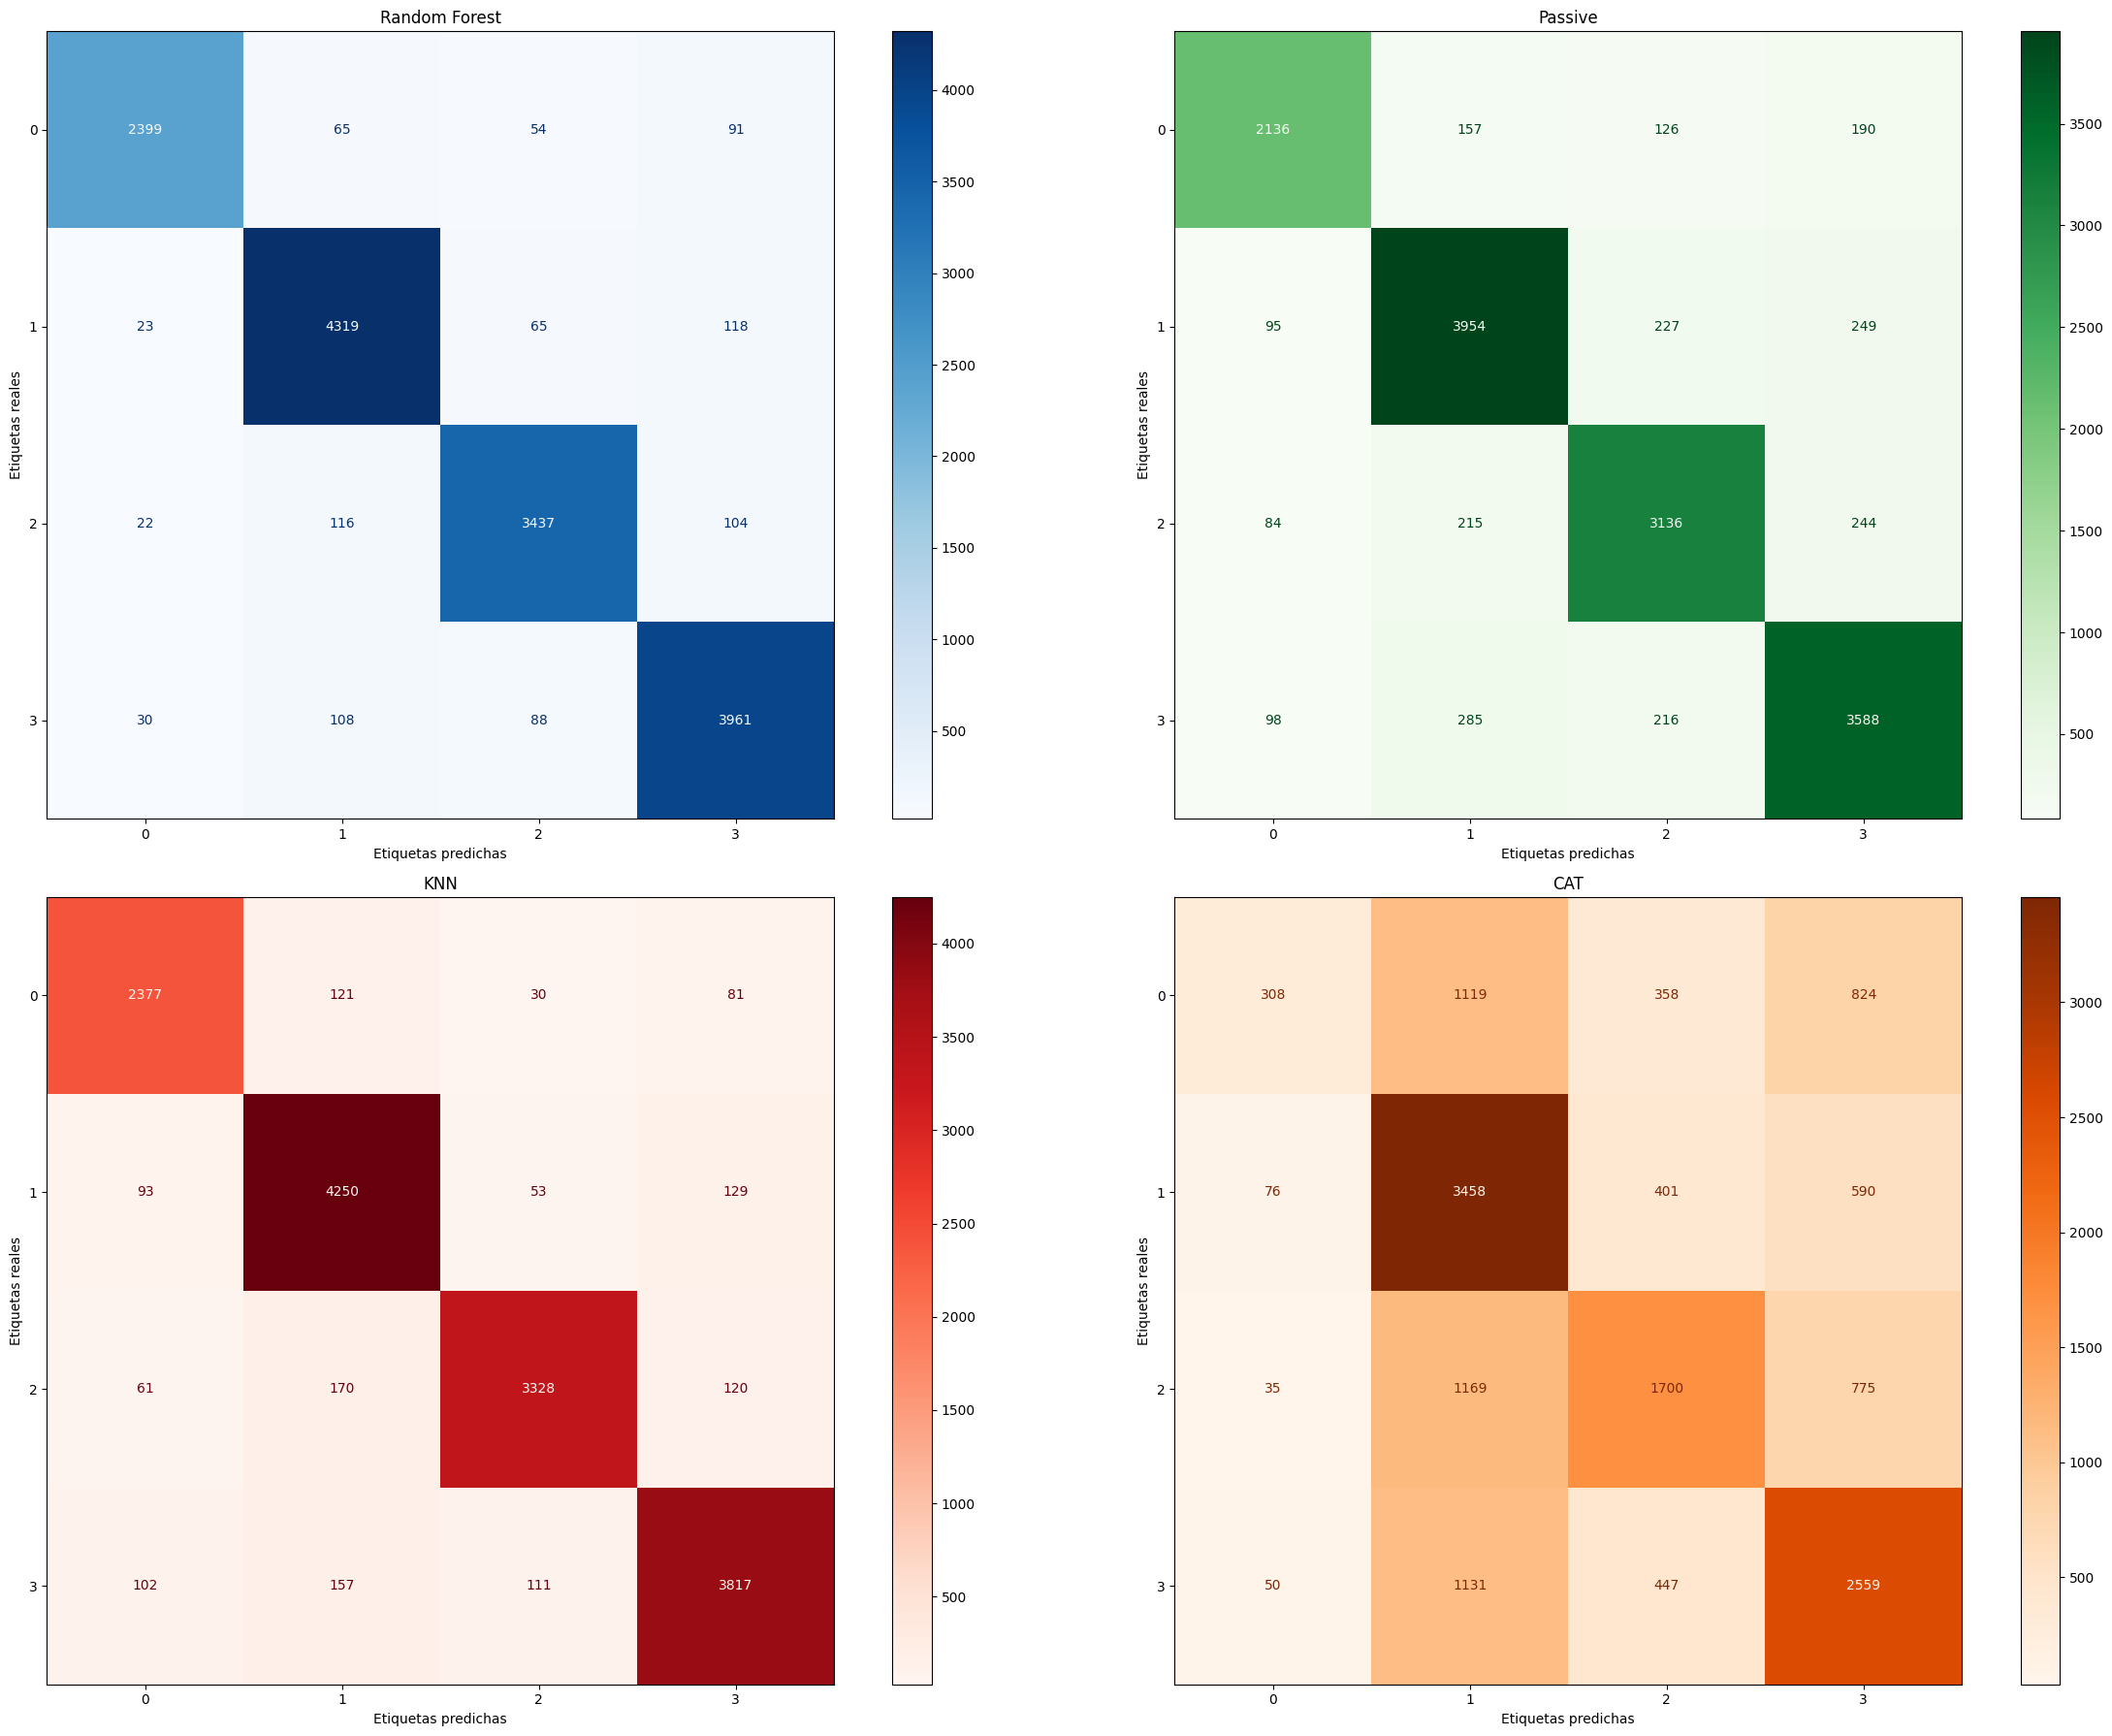

In [27]:
# Confusion matrix
modelos = [rf_model, clf, knn_model, catboost_model]
nombres_modelos = ['Random Forest', 'Passive', 'KNN', 'CAT']
colores = ['Blues', 'Greens', 'Reds', 'Oranges']  # Esquema de colores diferente para cada gráfico

# figure size
plt.figure(figsize=(24, 18))

# Iterate over the models
for i, (modelo, nombre_modelo, color) in enumerate(zip(modelos, nombres_modelos, colores), start=1):
    # Get the predictions for the test set
    y_pred = modelo.predict(X_test)

    # Confusion matrix calculation
    matriz_confusion = confusion_matrix(y_test, y_pred)

    # Crear object
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)

    # Subplot for current model
    plt.subplot(2, 2, i)

    # Plot the confusion matrix with the specified color scheme
    disp.plot(cmap=color, ax=plt.gca())
    plt.xlabel('Etiquetas predichas')
    plt.ylabel('Etiquetas reales')
    plt.title(nombre_modelo)

plt.tight_layout()
plt.show()